# Performance Visualisation

In [225]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

import sys
import os
import glob
import json

In [226]:
def get_data_as_data_frame(path):
    with open(path, 'r') as file:
        raw_data = json.load(file)
    transformed = { item['algorithm'].upper(): item['scores'] for item in raw_data}
    df = pd.DataFrame.from_dict(transformed)
    # Reorder the columns
    df = df[['NCC', 'NSC2', 'NSC3', 'NSC5', 'NN', 'PBACK', 'PMSE']]
    return df, raw_data

def plot_boxplot(path):
    df, raw_data = get_data_as_data_frame(path)
    pca = raw_data[0]['pca']
    data_set = '{} {}'.format(
        ('PCA transformed' if pca else 'original'),
        raw_data[0]['data_set'].upper()
    )
    fig, ax = plt.subplots(figsize=(10, 8))
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=True)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.grid(True)
    ax.set_axisbelow(True)
    ax.set_ylabel('Accuracy')
    #sns.boxplot(data=df, ax=ax, showfliers=True, showmeans=True, width=0.5)
    #sns.swarmplot(data=df, ax=ax)
    sns.violinplot(data=df, ax=ax, palette="Set1")
    print('Performance for the {} data set.'.format(data_set))

In [227]:
benchmark_results_dir = os.path.realpath(os.path.join('..', 'benchmark_results'))
paths = glob.glob(os.path.join(benchmark_results_dir, '*.json'))

Performance for the original ORL data set.


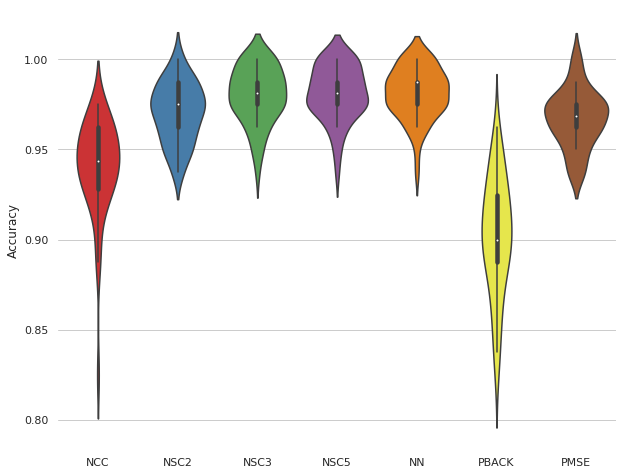

In [215]:
plot_boxplot(paths[0])

Performance for the PCA transformed MNIST data set.


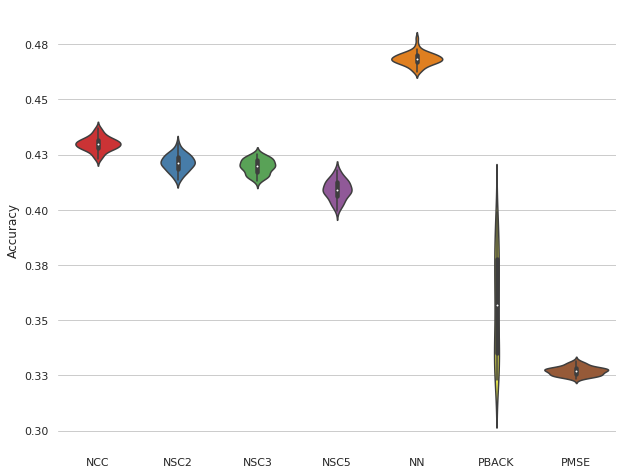

In [217]:
plot_boxplot(paths[1])

Performance for the PCA transformed ORL data set.


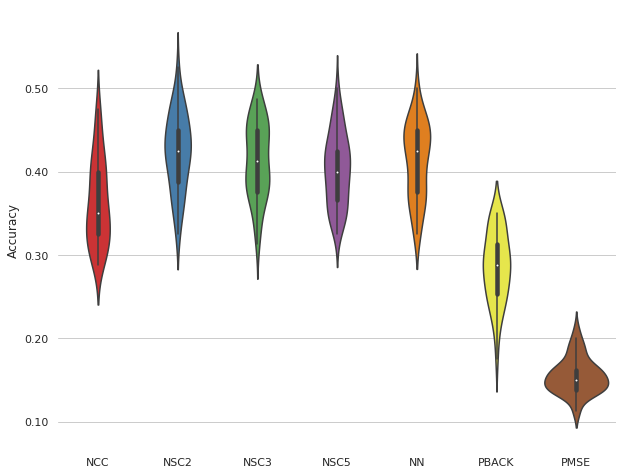

In [218]:
plot_boxplot(paths[2])

Performance for the original MNIST data set.


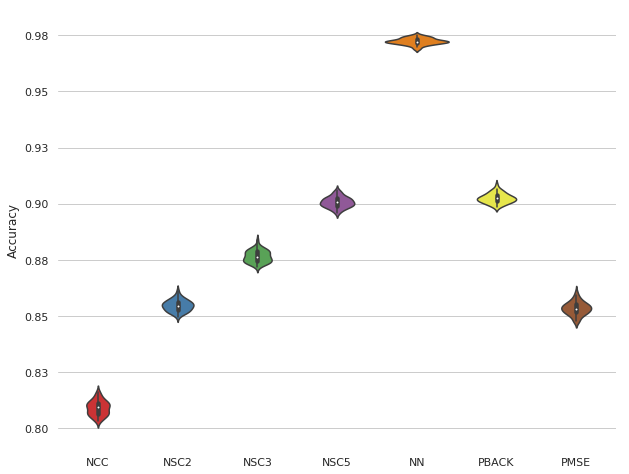

In [219]:
plot_boxplot(paths[3])